In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data=ImageDataGenerator(rescale=1/255)
test_data= ImageDataGenerator(rescale=1/255) 

In [3]:
train_path = r"D:\datasets\DL\brain tumour\Training"
test_path = r"D:\datasets\DL\brain tumour\Testing"

In [4]:
train= train_data.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=64,
    class_mode="categorical"
)

Found 2870 images belonging to 4 classes.


In [5]:
classes= [x for x in train.class_indices.keys()]
classes

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [6]:
test= test_data.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=64,
    class_mode="categorical"
)

Found 394 images belonging to 4 classes.


In [7]:
model= keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64,(3,3),activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),

    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(4,activation='softmax')
])

C:\Users\Tanmay LImje\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 665,252 (2.54 MB)

 Trainable params: 665,252 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
report = model.fit(train,epochs=20,validation_data=test)

Epoch 1/20


C:\Users\Tanmay LImje\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 412ms/step - accuracy: 0.3092 - loss: 1.3687 - val_accuracy: 0.2056 - val_loss: 1.4243
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 391ms/step - accuracy: 0.5043 - loss: 1.2523 - val_accuracy: 0.2437 - val_loss: 1.7337
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 390ms/step - accuracy: 0.5276 - loss: 1.0916 - val_accuracy: 0.1853 - val_loss: 1.7951
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 391ms/step - accuracy: 0.5837 - loss: 1.0010 - val_accuracy: 0.2107 - val_loss: 1.6964
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 395ms/step - accuracy: 0.6095 - loss: 0.9295 - val_accuracy: 0.2665 - val_loss: 2.0730
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 391ms/step - accuracy: 0.6294 - loss: 0.8826 - val_accuracy: 0.2538 - val_loss: 2.2831
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 391ms/step - accuracy: 0.6685 - loss: 0.8115 - val_accuracy: 0.3020 - val_loss: 1.8644
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 390ms/step - accuracy: 0.6813 - loss: 0.7556 - val_accuracy: 0.274

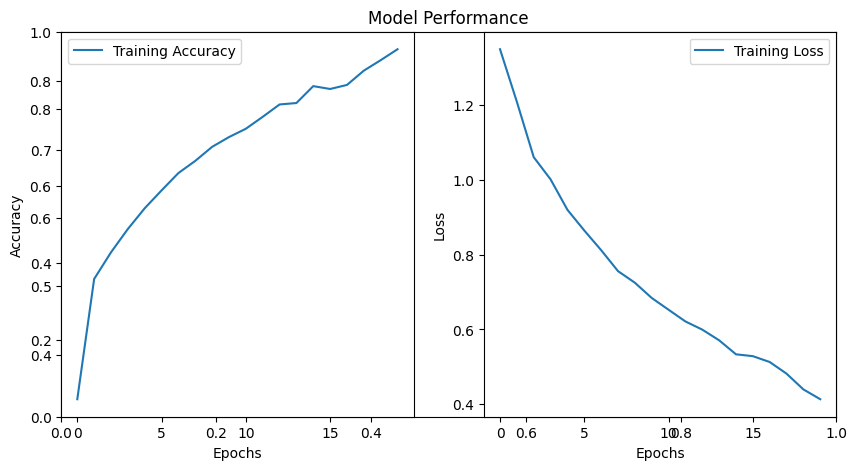

In [11]:
plt.figure(figsize=(10,5))
plt.title("Model Performance")
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(report.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.plot(report.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


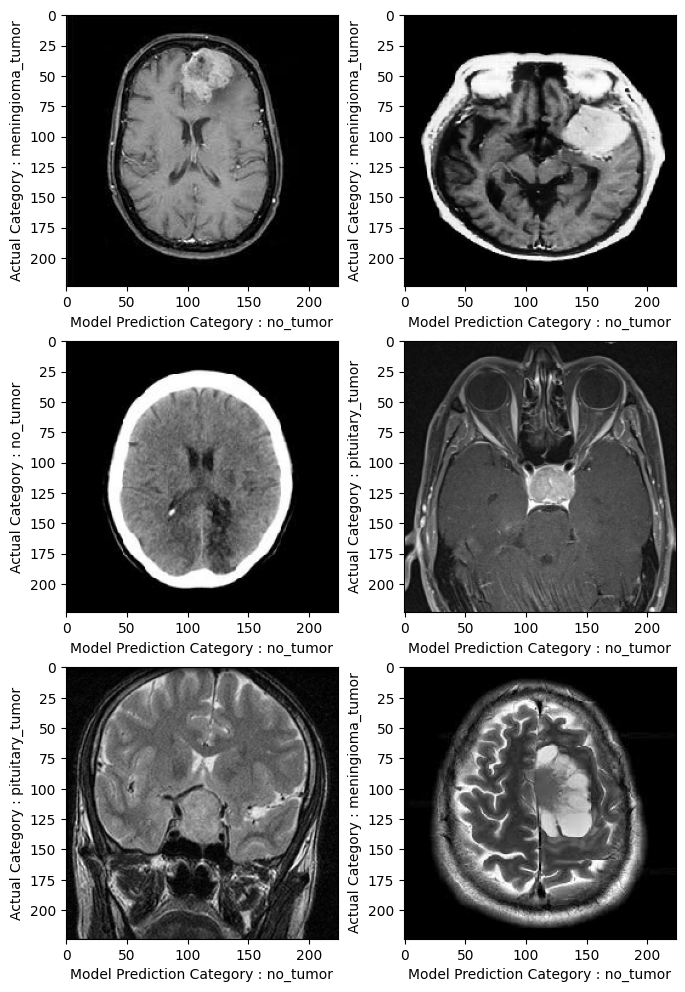

In [12]:
def softmax_to_category(x):
    return np.argmax(x)


plt.figure(figsize=(8,12))

for x in range(6, 12):
    plt.subplot(3, 2, x + 1 - 6)
    # Reshape the image to add a batch dimension
    image = test[0][0][x]
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    plt.xlabel(f"Model Prediction Category : {classes[softmax_to_category(model.predict(image))]}")
    plt.ylabel(f"Actual Category : {classes[softmax_to_category(test[0][1][x])]}")
    plt.imshow(test[0][0][x])